# Level 3 – Task 2: Votes vs Rating Correlation

## 🔍 Objective:
Analyze the relationship between the number of **Votes** and **Aggregate rating** to determine:
- Whether more popular restaurants tend to be better rated
- If votes are a good proxy for customer satisfaction

## 🛠️ Approach:
- Clean and convert the `Votes` and `Aggregate rating` columns
- Plot a scatter plot to visualize correlation
- Calculate Pearson correlation coefficient
- Use a regression line for clarity

## 📈 Insight:
This helps identify whether crowd-backed restaurants actually deliver quality, or if popularity ≠ performance.

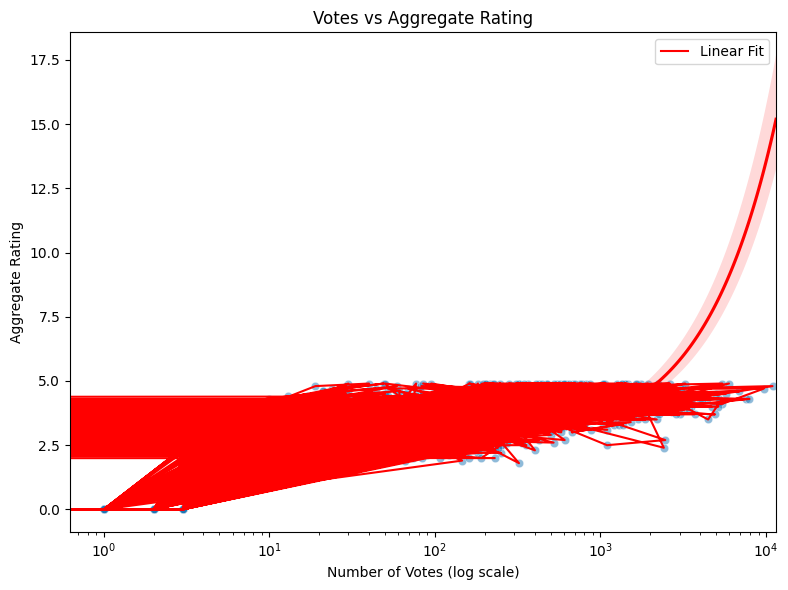

📊 Pearson Correlation: 0.3137


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load data
df = pd.read_csv("../Dataset.csv")

# Clean: drop rows with missing or non-numeric ratings/votes
df = df.dropna(subset=['Aggregate rating', 'Votes'])
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Scatter Plot: Votes vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.5)
regplot = sns.regplot(data=df, x='Votes', y='Aggregate rating', scatter=False, color='red', truncate=False)
regplot.plot(df['Votes'], df['Aggregate rating'], label="Linear Fit", color='red')
plt.yscale('linear')
plt.xscale('log')  # log scale for better spread
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("Aggregate Rating")
plt.title("Votes vs Aggregate Rating")
plt.legend()
plt.tight_layout()
plt.show()

# Correlation Coefficient
corr, _ = pearsonr(df['Votes'], df['Aggregate rating'])
print(f"📊 Pearson Correlation: {corr:.4f}")